<a href="https://colab.research.google.com/github/olenaageyeva/MyApiProject/blob/main/Copy_of_CodingADecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split

## Importing and Formatting

In [ ]:
# We load the dataset in the "iris" variable.
iris = datasets.load_iris()
print(f"Dataset size {iris.data.shape}")
print(f"Label categories: {iris.target_names}")
print(f"Column (feature) names: {iris.feature_names}")

Dataset size (150, 4)
Label categories: ['setosa' 'versicolor' 'virginica']
Column (feature) names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Because SciKit stores the iris dataset as a NumPy array, it lacks the formatting we've grown accustomed to. The following code formats the data with column names and row numbers for added readability. You don't need to worry about how this code works, though feel free to look through it and follow what it's doing.

In [ ]:
# We store the features in a dataframe.
features = pd.DataFrame(iris.data, columns = iris.feature_names)
# We arrange the target in a unique array of type series.
target = pd.Series(iris.target, name='species').map(dict(zip(range(3), iris.target_names)))
# Concatenating in dataframe
data = pd.concat([target, features], axis=1)
data

,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3
146,virginica,6.3,2.5,5.0,1.9
147,virginica,6.5,3.0,5.2,2.0
148,virginica,6.2,3.4,5.4,2.3


## Data Exploration

In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.isnull().sum()

## Preprocessing

In [ ]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = data.loc[:, features]
y = data.loc[:, 'species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=12)
print(f"Train features length: {len(X_train)}, label train length: {len(y_train)}")
print(f"Test features length: {len(X_test)}, label test length: {len(y_test)}")

Train features length: 105, label train length: 105
Test features length: 45, label test length: 45


## Training

In [ ]:
dt_model = tree.DecisionTreeClassifier(random_state=1)
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 1,
 'splitter': 'best'}

In [ ]:
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_pred

array(['setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

## Testing

In [ ]:
from sklearn.metrics import accuracy_score
total_records = len(y_test)
num_correct = accuracy_score(y_test, y_pred, normalize=False) # normalize would round up to an integer, so we set it False
print(num_correct / total_records)

0.9555555555555556


## Visualization

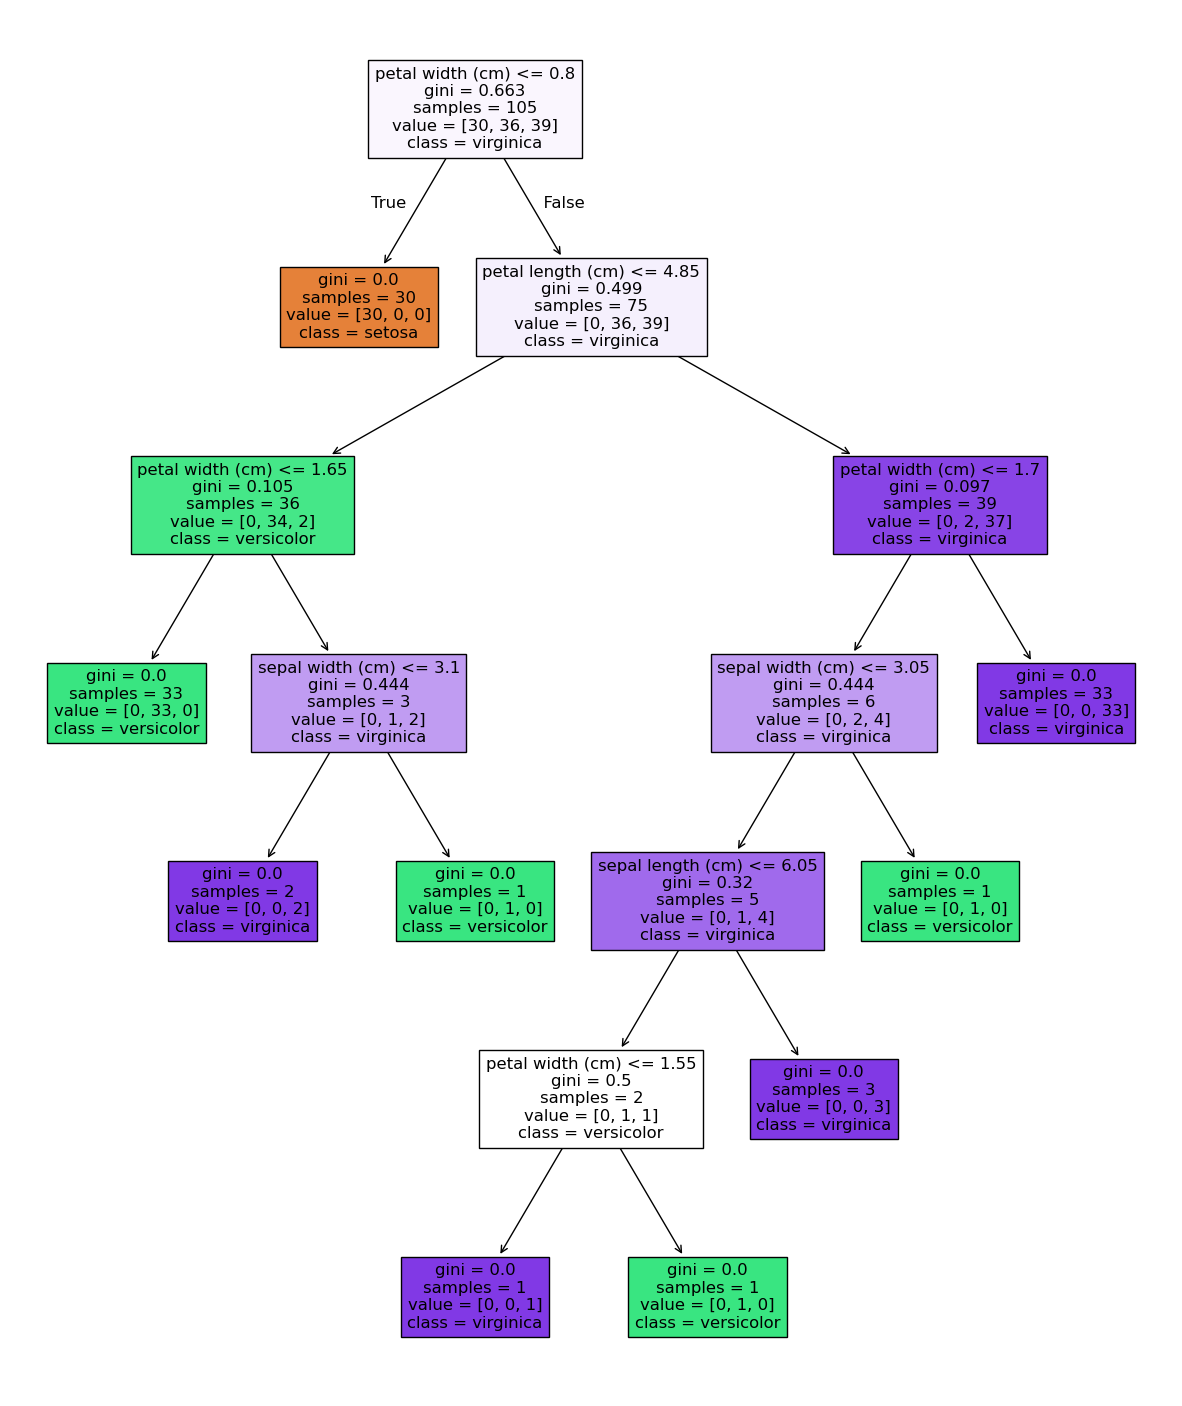

In [ ]:
fig = plt.figure(figsize=(15,18))
viz = tree.plot_tree(dt_model, feature_names=features, class_names=data['species'].unique(), filled=True)